## Kmean

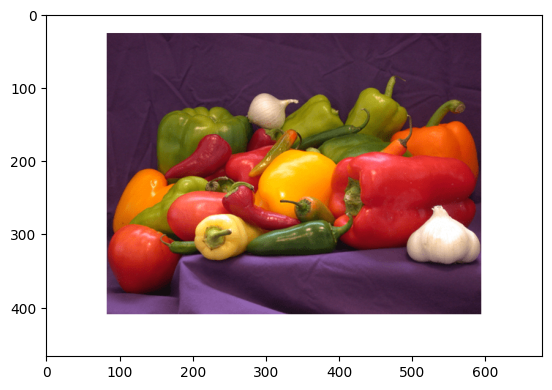

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

im = plt.imread("peppers.png")[:,:,:3]
plt.imshow(im)

In [2]:
def kmeansp(data,k=7):
    
    # Step 1: Choosing random points to be clusters
    depth = 3
    k = 7
    # centroids = np.zeros((7,depth))
    centroids =data[random.sample(range(data.shape[0]), 1)]
    print(data.shape)
    for i in range(k-1):
        distances = distance(data.reshape(-1,1,depth),centroids.reshape(1,-1,depth))
        # find closest centroids for each poitn
        labels = np.argmin(distances,axis=1)
        total_distance = 0
        current_prob = []
        for i in range(labels.shape[0]):
            # distance from this point to the nearest centroid / total distance
#             print(centroids.shape)
#             print(labels[i])
            current_distance = np.sum((data[i].reshape(-1,depth)-centroids[labels[i],:])**2)
            total_distance = total_distance + current_distance

        for i in range(labels.shape[0]):
            # distance from this point to the nearest centroid / total distance
            current_prob.append(np.sum((data[i].reshape(-1,depth)-centroids[labels[i],:])**2)/total_distance)
        centroid_new = data[np.argmax(current_prob)]
        # update centroid
        centroids = np.vstack((centroids.reshape(-1,depth),centroid_new))
    centroids = centroids.reshape(1,k,-1)
    start = time.time()
    data = data.reshape(-1,1,depth)
    # creating an array to store labels
    labels = np.zeros(len(data),dtype=np.float32)
    previous_labels = np.zeros(len(data))
    comparison = np.zeros(len(data),dtype='bool')
    i = 0;
    while(comparison.all() != True):
        # if exceed 200 iterations break the loop
        if (i>200):
            break
        # Step 2: Assigning each point to its closest centroid
        # calculating distance
        distances = distance(data,centroids)
        print(distances.shape)
        # find closest centroids for each poitn
        previous_labels = labels.copy()
        labels = np.argmin(distances,axis=1)
        #Step 3: updating centroids
        for center in range(k):
            centroids[0,center,:] = np.mean(data[labels==center].reshape(-1,depth),axis=0)

        # compare to see if no new points are reassigned => if the centroids are not updated
        comparison = (labels == previous_labels)
        i = i+1
    stop = time.time()
    print(stop-start)
    return centroids,labels

In [3]:
def img_2_data(path):
    img = cv2.imread(path)
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    n, d, _ = img.shape
    X = img.reshape((n*d, -1)).astype('int')
    return X, img
def distance(x, centroid):
    # Compute the difference, following by raising to power 2 and summing
    dist = ((x - centroid) ** 2).sum(axis = 2)   # change of axis
    
    return dist

In [4]:
import cv2
import random
import numpy as np
img2_path = "peppers.png"
X, img = img_2_data(img2_path)
import time
start = time.time()

centroids , labels = kmeansp(X,13)
stop = time.time()
# labels = labels.reshape(data1.shape[0]*data1.shape[1])
# flatten the labels array
labels = labels.flatten()
segmented_image = centroids[0,labels.flatten()]

(316626, 3)


C:\Users\AW\AppData\Local\Temp\ipykernel_13888\1828251423.py:20: RuntimeWarning: overflow encountered in long_scalars
  total_distance = total_distance + current_distance


(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
(316626, 7)
1.161930799484253


In [5]:
labels = labels.reshape(467,678)

In [6]:
from skimage import color
from skimage import segmentation

In [7]:
rs = color.label2rgb(labels,im) # color each pixel according to its label

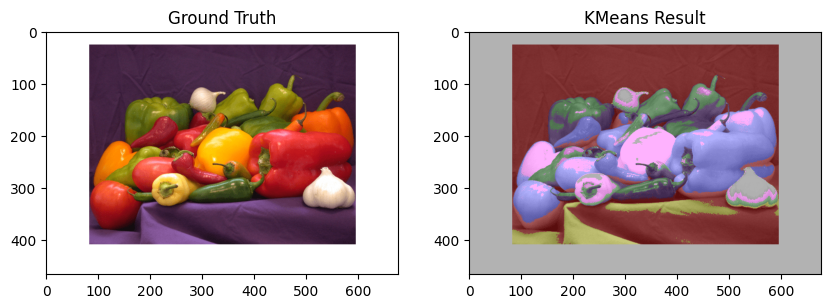

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Ground Truth")
plt.imshow(im)
plt.subplot(122)
plt.title("KMeans Result")
plt.imshow(rs)

### GMM

In [57]:
from sklearn.mixture import GaussianMixture

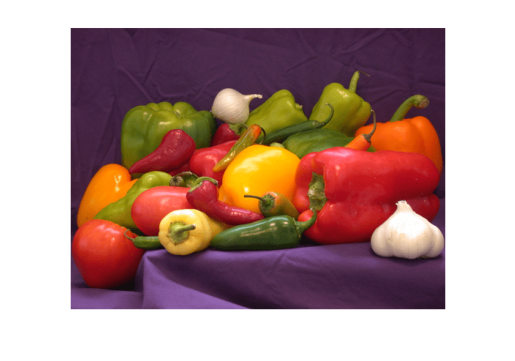

In [58]:
image = cv2.imread('peppers.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [59]:
height, width, channels = image.shape
features = image.reshape(-1, channels)


In [60]:
height, width, channels

(467, 678, 3)

In [61]:
# Define the number of segments you want (number of Gaussian components)
num_segments = 13

gmm_model = GaussianMixture(n_components=num_segments, random_state=42)
gmm_model.fit(features)
labels = gmm_model.predict(features)


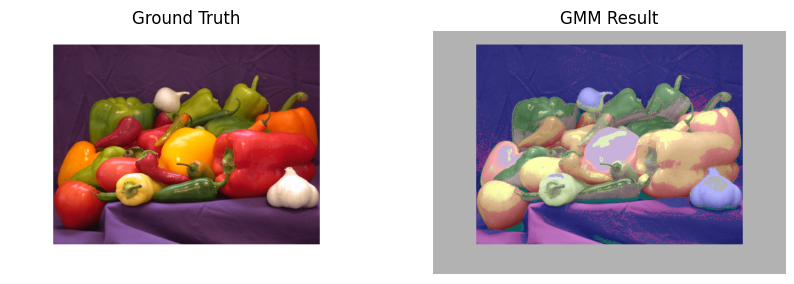

In [65]:
# Step 4: Color each segment in the image
segmented_image = labels.reshape(height, width)


colored_image = color.label2rgb(segmented_image, image) 

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Ground Truth")
plt.imshow(im)
plt.axis('off')
plt.subplot(122)
plt.title("GMM Result")
plt.imshow(colored_image)
plt.axis('off')
plt.show()

## So sánh hiệu quả 2 phương pháp

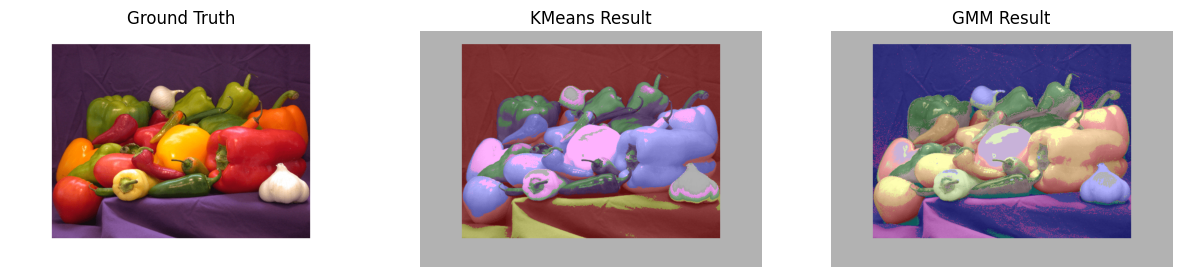

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.title("Ground Truth")
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.title("KMeans Result")
plt.imshow(rs)
plt.axis('off')
plt.subplot(133)
plt.title("GMM Result")
plt.imshow(colored_image)
plt.axis('off')
plt.show()

## Nhận xét: GMM cho ra kết quả tốt hơn so với KMeans với cùng số cluster-components = 13